KELP


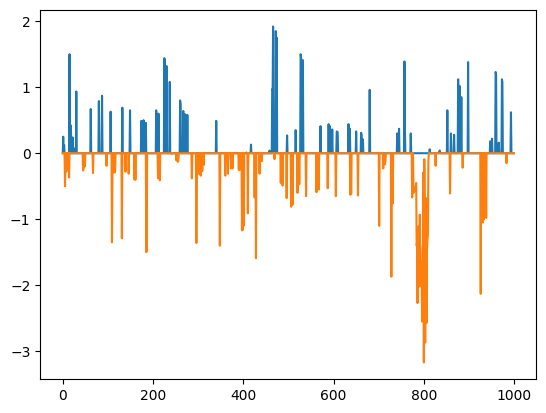

In [80]:
import csv
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objects as go


def getNumber(val):
    try:
        return float(val)
    except:
        return val

def prefixSum(arr):
    for i in range(1,len(arr)):
        arr[i]+=arr[i-1]
    return arr

def readTradeCSV(filename):
    with open(filename, 'r') as file:
        csvreader = csv.reader(file,delimiter=';')
        header = next(csvreader)
        res = []
        for row in csvreader:
            nrow = [getNumber(val) for val in row]
            res+=[dict(zip(header,nrow))]
        return res

# entries = readTradeCSV("round1data/prices_combined.csv")
entries = readTradeCSV("mr_kelp.csv")

# entries = [entry for entry in entries if entry['day'] <= -1]
# entries += readTradeCSV("Data/round-1-island-data-bottle/prices_round_1_day_-1.csv")
# entries += readTradeCSV("Data/round-1-island-data-bottle/prices_round_1_day_0.csv")
# # entries = readTradeCSV("r1_bad_money.csv")
# # print(len(entries))
# with open('Data/round-1-island-data-bottle/prices_combined.csv', 'w', newline='') as csvfile:
#     fieldnames = entries[0].keys()
#     writer = csv.DictWriter(csvfile, fieldnames=fieldnames, delimiter=';')

#     writer.writeheader()
#     writer.writerows(entries)

products = list(set([e['product'] for e in entries]))
groupedEntries = dict(zip(products,[[] for _ in range(len(products))]))
for ent in entries:
    groupedEntries[ent['product']]+=[ent]

def getGroupedProp(name):
    return [np.array([ent[name] for ent in group]) for (_,group) in groupedEntries.items()]

# good_test = [[{k: v for k, v in ent.items() if k not in ['profit_and_loss']} for ent in group] for (_,group) in groupedEntries.items()]

prices = getGroupedProp('mid_price')

'''
for i in range(len(products)):
    print(products[i])
    plt.figure(figsize=(18,4))
    
    plt.plot(prices[i], linewidth=.3)  # Thinner line


    plt.show()
'''

# for i in range(len(products)):
#     print(products[i])
#     fig = go.Figure()
#     fig.add_trace(go.Scatter(y=prices[i], mode='lines', line=dict(width=0.5)))
#     fig.update_layout(title=products[i], height=300, width=1000)
#     fig.show()
arr = getGroupedProp("mid_price")[2]
print(products[2])
def runAve(arr,n):
    out = [0]*len(arr)
    val = 0
    size = 0
    for i in range(len(arr)):
        val+=arr[i]
        size+=1
        if i>=n:
            val-=arr[i-n]
            size-=1
        out[i]=val/size
    return np.array(out)

#plt.plot(arr)
# plt.plot(runAve(arr,100))
# plt.plot(runAve(arr,50))
# plt.show()
# plt.plot(runAve(arr,100)-runAve(arr,50))
# plt.show()

plt.plot([max(x,0) for x in getGroupedProp("bid_price_1")[2]-runAve(arr,50)])
plt.plot([min(x,0) for x in getGroupedProp("ask_price_1")[2]-runAve(arr,50)])
plt.show()

In [46]:
#all data beside our profits is same regardless of our orders
str1 = jsonpickle.encode(good_test)
str2 = jsonpickle.encode(no_test)
str1==str2

NameError: name 'jsonpickle' is not defined